# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.shape

(5391, 6)

In [5]:
data.isna().value_counts()

Rank   Release_Date  Movie_Title  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
False  False         False        False                  False                False                 5391
dtype: int64

In [11]:
data.duplicated().value_counts()

False    5391
dtype: int64

In [14]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [13]:
data.head()
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$', '').str.replace(',', '')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$', '').str.replace(',', '')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$', '').str.replace(',', '')

data.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_11164\3501503303.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$', '').str.replace(',', '')
C:\Users\danie\AppData\Local\Temp\ipykernel_11164\3501503303.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$', '').str.replace(',', '')
C:\Users\danie\AppData\Local\Temp\ipykernel_11164\3501503303.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings wh

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [14]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format='%m/%d/%Y')
data['Release_Date']

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [15]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [16]:
data['USD_Production_Budget'].describe()
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Production_Budget'].mean()


31113737.57837136

In [17]:
print(data['USD_Worldwide_Gross'].dtype)

data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])

data['USD_Worldwide_Gross'].mean()

object


88855421.96271564

In [18]:
data['USD_Domestic_Gross'].dtype
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])
data['USD_Domestic_Gross'].min()

0

In [19]:
data['Profit Margin'] = data['USD_Worldwide_Gross'] / data['USD_Production_Budget']

bottom_25 = data['Profit Margin'].quantile(0.25)
bottom_25

0.46435027500000003

In [6]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


# Investigating the Zero Revenue Films

In [24]:
data['USD_Worldwide_Gross'].idxmax()
data.loc[data['USD_Worldwide_Gross'].idxmax()]


Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Profit Margin                           6.55
Name: 3529, dtype: object

In [25]:
data.loc[data['USD_Worldwide_Gross'].idxmin()]

Rank                                    5140
Release_Date             1916-05-09 00:00:00
Movie_Title                      Intolerance
USD_Production_Budget                 385907
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Profit Margin                           0.00
Name: 1, dtype: object

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [26]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit Margin
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,100.00
1,5140,1916-05-09,Intolerance,385907,0,0,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,40.00
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,30.00
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,89.80


In [28]:
var = data['USD_Domestic_Gross'] == 0
var.value_counts()

False    4879
True      512
Name: USD_Domestic_Gross, dtype: int64

In [44]:
highest_budget_no_gross = data[data['USD_Domestic_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)

highest_budget_no_gross

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit Margin
5388,96,2020-12-31,Singularity,175000000,0,0,0.00
5387,126,2018-12-18,Aquaman,160000000,0,0,0.00
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,0.00
5385,366,2018-10-08,Amusement Park,100000000,0,0,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,0.06
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,0.00
3056,5374,2007-12-31,Tin Can Man,12000,0,0,0.00
4907,5381,2015-05-19,Family Motocross,10000,0,0,0.00
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,0.00


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [52]:
loss = data['USD_Worldwide_Gross'] == 0
loss.value_counts()

False    5034
True      357
Name: USD_Worldwide_Gross, dtype: int64

### Filtering on Multiple Conditions

In [53]:
highest_budget_no_gross_internationally = data[data['USD_Worldwide_Gross'] == 0].sort_values('USD_Production_Budget', ascending=False)

highest_budget_no_gross_internationally

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit Margin
5388,96,2020-12-31,Singularity,175000000,0,0,0.00
5387,126,2018-12-18,Aquaman,160000000,0,0,0.00
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,0.00
5385,366,2018-10-08,Amusement Park,100000000,0,0,0.00
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,0.00
...,...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,0.00
3056,5374,2007-12-31,Tin Can Man,12000,0,0,0.00
4907,5381,2015-05-19,Family Motocross,10000,0,0,0.00
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,0.00


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [58]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit Margin
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,0.04
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,2.56
5360,4832,2017-07-03,Departure,1100000,27561,0,0.03
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,1.60
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0,0.01


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [59]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [76]:
not_released = data['Release_Date'] > scrape_date
not_released_movies = data[not_released]


In [79]:
not_released = data['Release_Date'] > scrape_date
data_clean = data[~not_released]


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [80]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



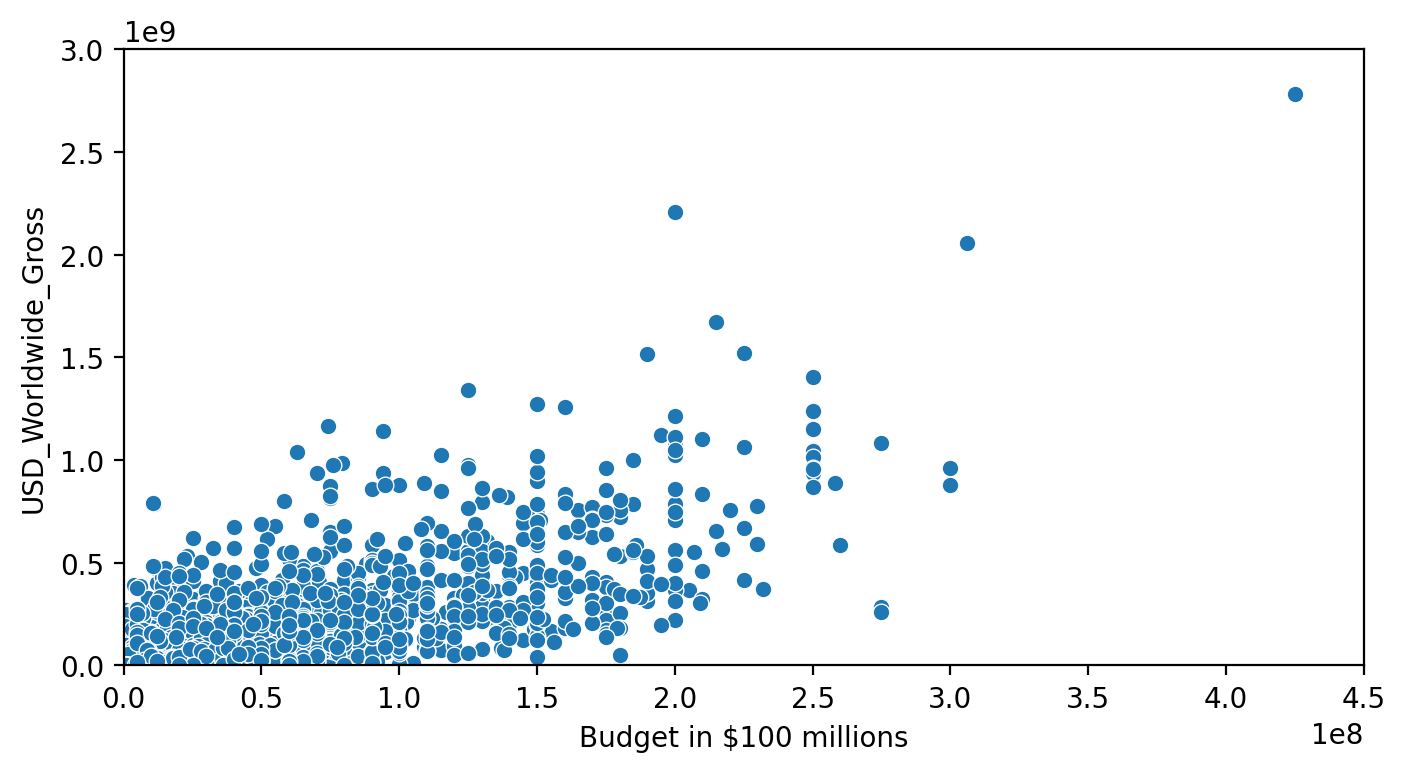

In [85]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y="USD_Worldwide_Gross")

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       xlabel="Budget in $100 millions")

plt.show()

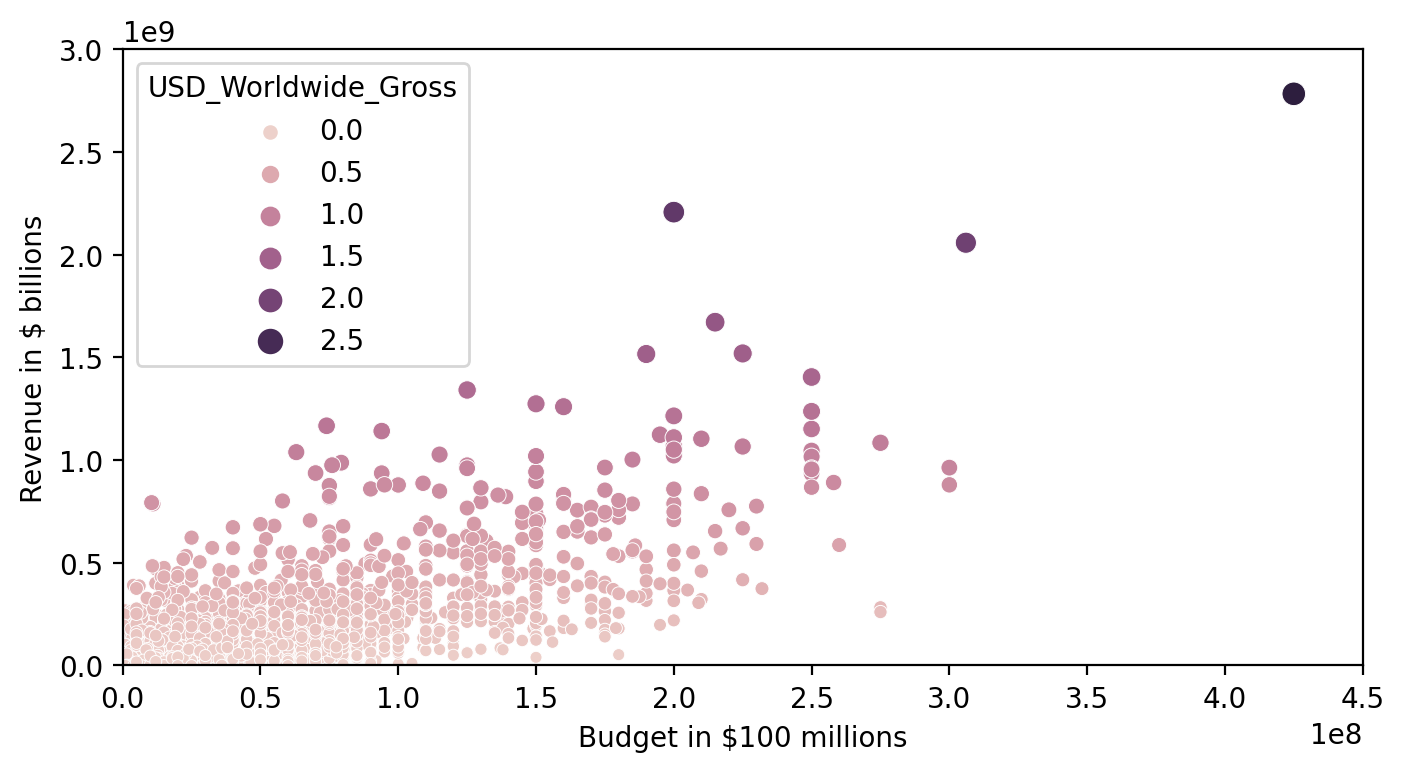

In [86]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

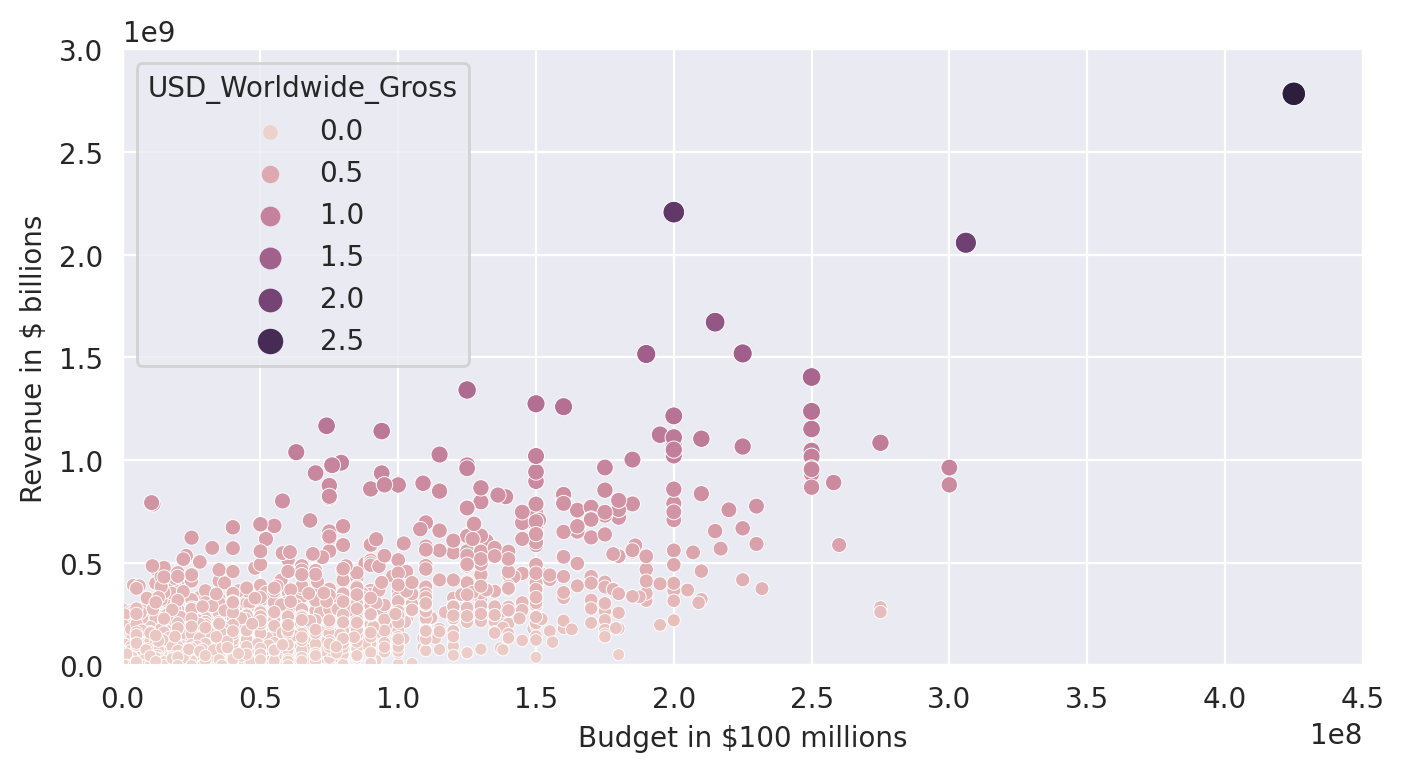

In [87]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

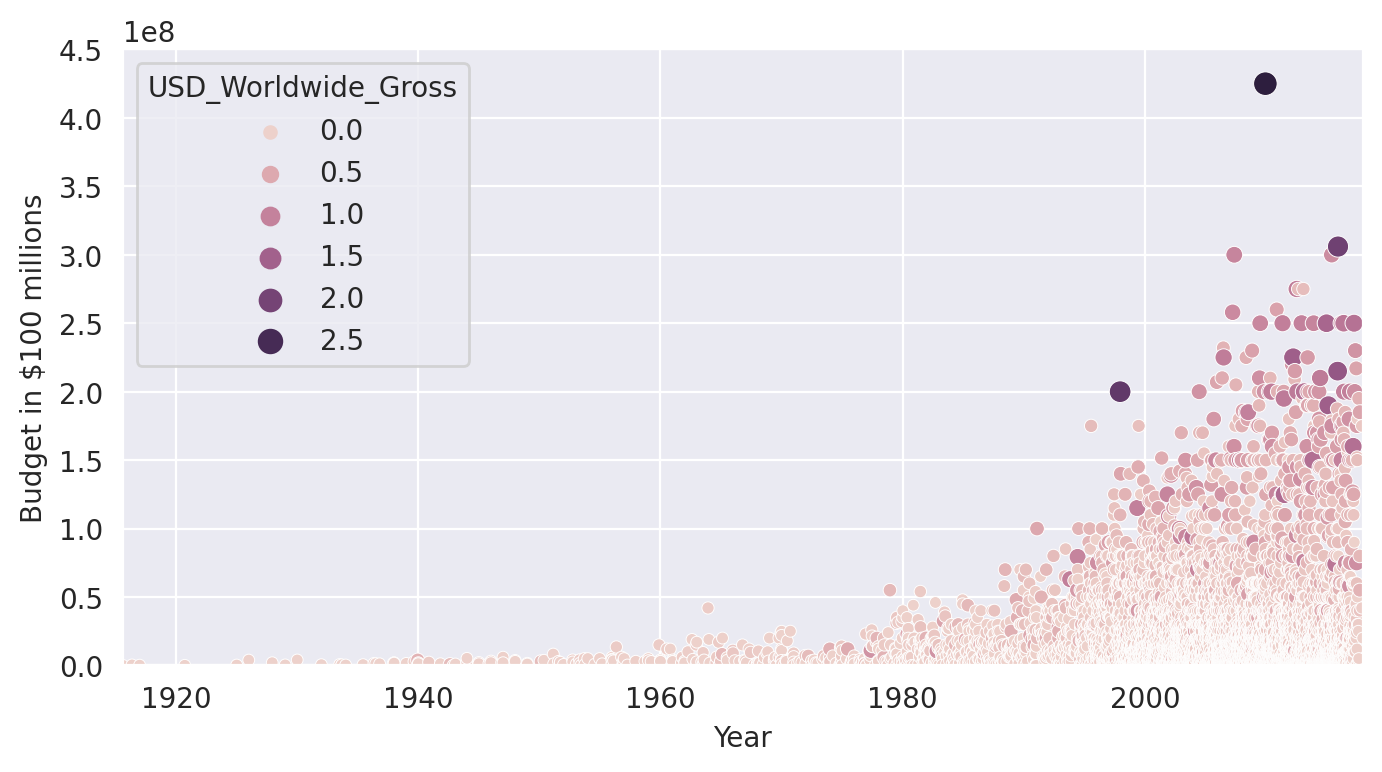

In [88]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [93]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

decades = years//10*10
data_clean['Decade'] = decades

old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

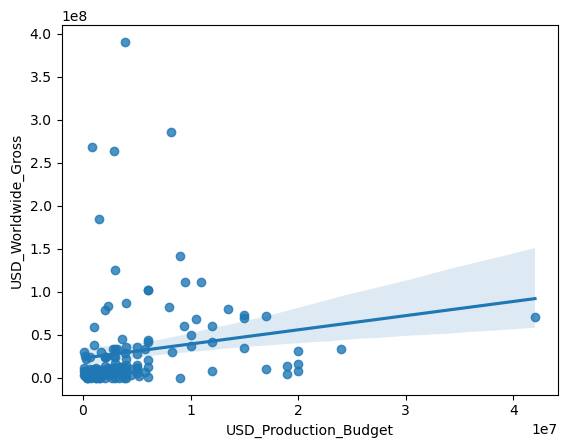

In [94]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

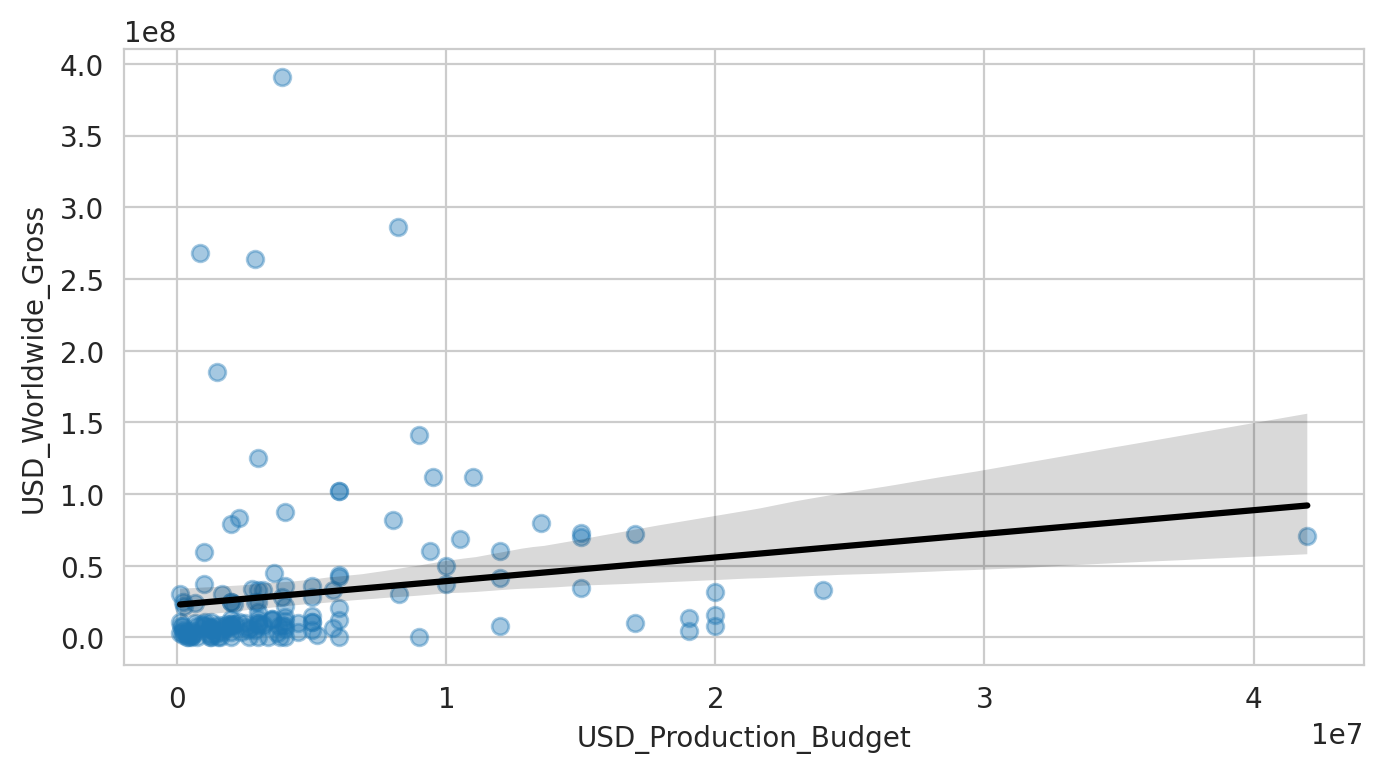

In [95]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

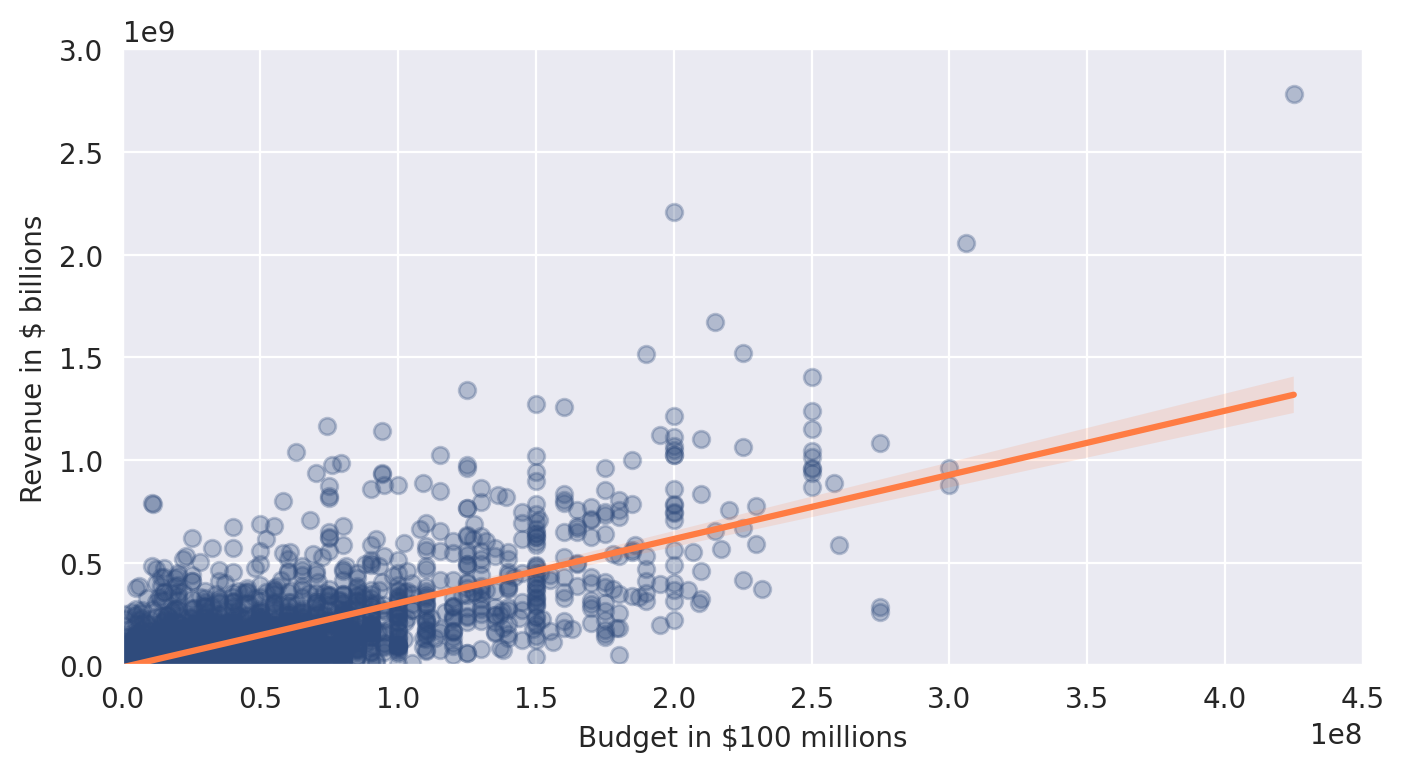

In [97]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [98]:
from sklearn.linear_model import LinearRegression

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [100]:
regression = LinearRegression()


In [101]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [102]:
regression.fit(X, y)

LinearRegression()

In [103]:
regression.score(X, y)

0.5577032617720403